In [2]:
import netCDF4
import numpy as np
import os
import imageio
import cv2

CT_path='./conversion_table/'

x = 416
y = 476
rg = 64
def ncTonpy(input_ncfile_path):
    ncfile = netCDF4.Dataset(input_ncfile_path,'r',format='netcdf4')
    ipixel=ncfile.variables['CLD']
    ipixel_process = ipixel[x:x+rg,y:y+rg]
    #ipixel_process *= 255 # or any coefficient
    I = ipixel_process.astype(np.uint8)
    I = cv2.normalize(I, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
                
    
    I=255-I
    
    return I

In [6]:
input_path = "D:\VSCODE\weather_resource\\20220104cld"

training_data = []
for filename in os.listdir(input_path):
      nc_path = os.path.join(input_path,filename)

      #print(nc_path)
      #print(out_path)
      I=ncTonpy(nc_path)
      training_data.append(np.asarray(I))
training_data = np.reshape(training_data,(157,18,rg,rg))

In [11]:
training_data = np.reshape(training_data,(157,18,rg,rg))

In [19]:
training_data.shape

(359, 24, 200, 200)

In [9]:
with open('test.npy', 'wb') as f:
    np.save(f, training_data)

In [21]:
training_data= np.load("test.npy")

IndexError: index 9 is out of bounds for axis 0 with size 9

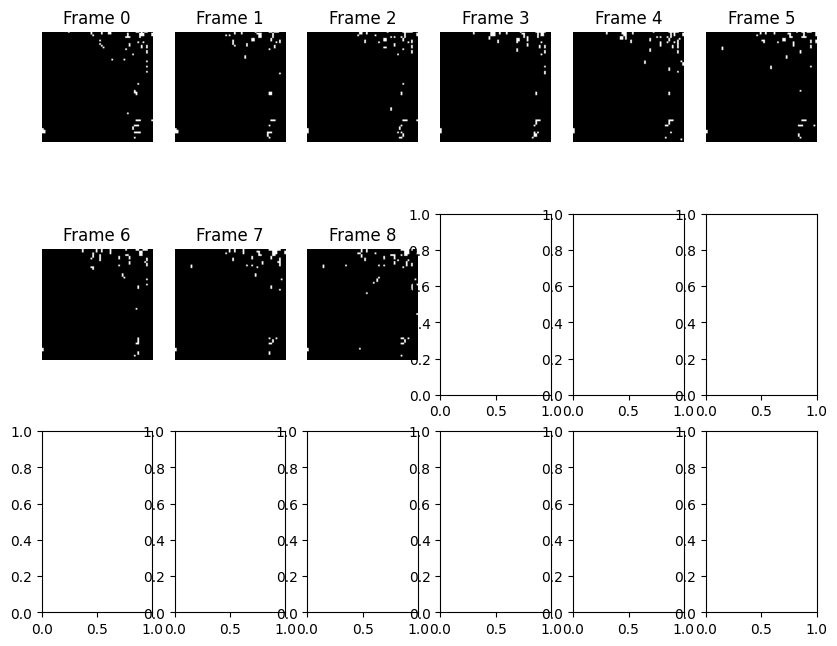

In [22]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 6, figsize=(10, 8))

# Plot each of the sequential images for one random data example.
#data_choice = np.random.choice(range(len(train_dataset)), size=1)[0]
data_choice = 0
for idx, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(training_data[data_choice][idx]), cmap="gray")
    ax.set_title(f"Frame {idx}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames for example {data_choice+1}.")
plt.show()